In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk


In [2]:
MNIST = pd.read_csv('train.csv')

features = MNIST.iloc[:3000,1:].values.reshape((3000,-1))

labels = MNIST.iloc[:3000,0].values.reshape(3000)

train,test,train_labels,test_labels = train_test_split(features,
                                                       labels,
                                                       test_size = 1/3,
                                                       random_state = 0,
                                                       shuffle = True)
train = normalize(train)

clf = MLPClassifier(hidden_layer_sizes = (200,200,200))

In [3]:
def confusion_image(trained_estimator, 
                    test_data, 
                    test_labels,
                    return_type = 'image'):
    
    confidence = trained_estimator.predict_proba(test_data)
    predicted_labels = trained_estimator.predict(test_data)
    
    if return_type == 'accuracy':
        return accuracy_score(test_labels, predicted_labels)
    
    
    d = {'Confidence': np.amax(confidence,1), 'Predicted Label': predicted_labels, 'True Label':test_labels}

    df = pd.DataFrame(data=d)
    dimensions = len(set(test_labels)),len(set(test_labels))
    
    a = np.zeros(dimensions)
    b = np.zeros(dimensions)
    for i in range(len(set(test_labels))):
        for j in range(len(set(test_labels))):
            true = df[df['True Label'] == i]
            a[i][j] = np.mean(df[(df['Predicted Label'] == i) & (df['True Label'] == j)])[0]
            b[i][j] = round(len(df[(df['Predicted Label'] == i) & (df['True Label'] == j)])/len(true)*100,1)
    
    if return_type == 'image':
        plt.figure(figsize=(8, 8))
        image = sns.heatmap(a.T,cmap = 'viridis', annot = b.T, fmt='1', cbar_kws = {'label': 'Confidence'})
        image.set(ylabel = 'True Label', xlabel = 'Predicted Label') 
        sns.set(font_scale = 1.3)
        return image, 1
    
    elif return_type == 'counts':
        return pd.DataFrame(b.T)
    
    elif return_type == 'confidence':
        return pd.DataFrame(a.T)

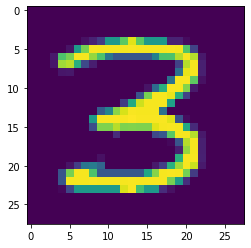

In [4]:
plt.imshow(((test[0]).reshape((28,28))),cmap = 'viridis')

(<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>, 1)

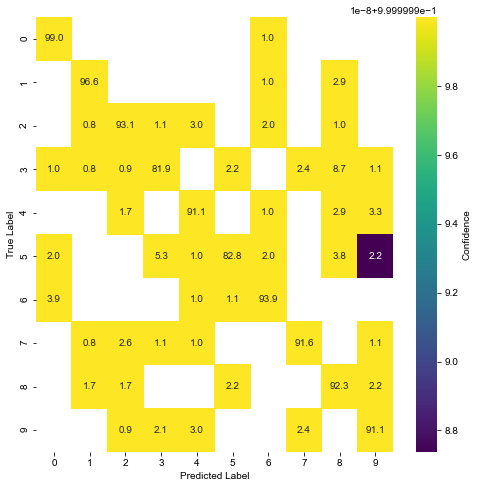

In [5]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test, test_labels)

In [6]:
test_10 = test.copy()

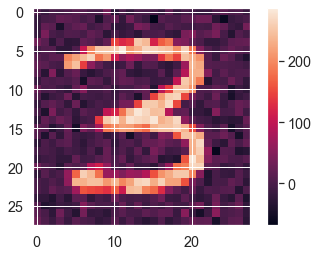

In [7]:
plt.imshow((test[0]+np.random.normal(0,20,784)).reshape(28,28))
plt.colorbar()

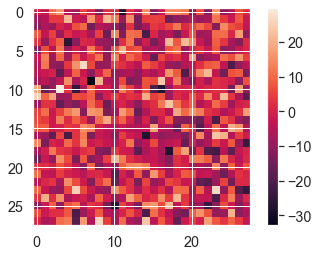

In [8]:
plt.imshow(np.random.normal(0,10,784).reshape(28,28))
plt.colorbar()

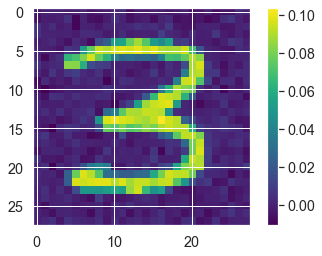

In [9]:
test_10 = test.copy()
for i in range(len(test_10)):
    test_10[i] = test_10[i] + np.random.normal(0,10,784)
test_10 = normalize(test_10)
plt.imshow((test_10[0].reshape((28,28))),cmap = 'viridis')
plt.colorbar()

(<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>, 1)

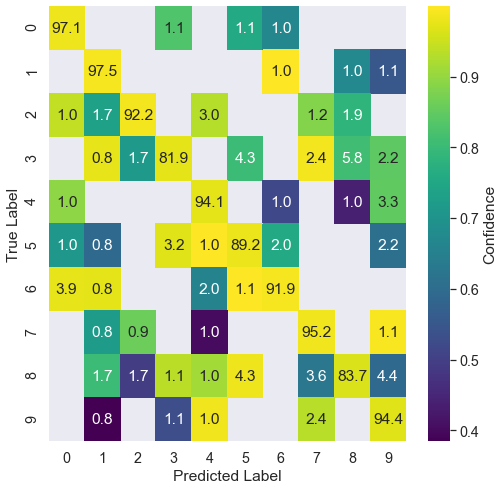

In [10]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_10, test_labels)

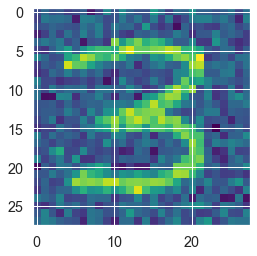

In [11]:
test_50 = test.copy()
for i in range(len(test_50)):
    test_50[i] = test_50[i] + np.random.normal(0,50,784)
test_50 = normalize(test_50)
plt.imshow((test_50[0].reshape((28,28))),cmap = 'viridis')

(<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>, 1)

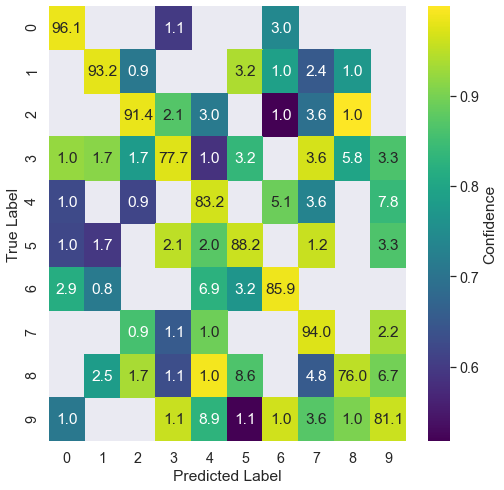

In [12]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_50, test_labels)

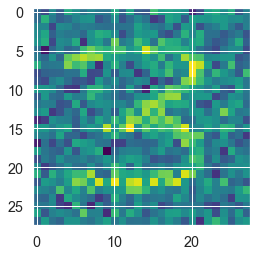

In [13]:
test_100 = test.copy()
for i in range(len(test_100)):
    test_100[i] = test_100[i] + np.random.normal(0,100,784)
test_100 = normalize(test_100)
plt.imshow((test_100[0].reshape((28,28))),cmap = 'viridis')

(<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>, 1)

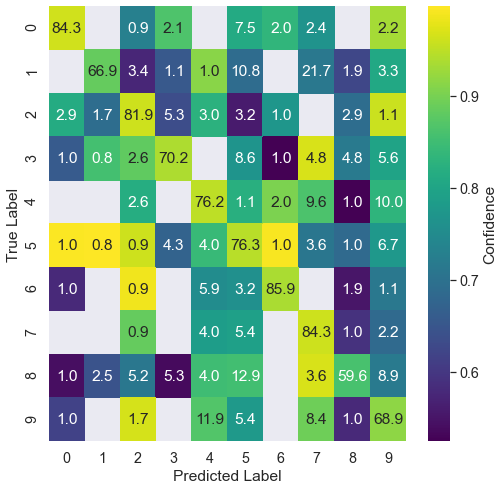

In [14]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_100, test_labels)

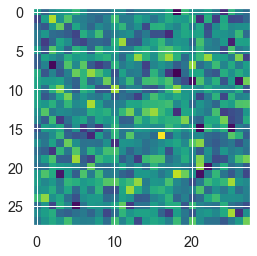

In [15]:
test_250 = test.copy()
#for i in test_250:
#    i+=np.random.randint(-250,250,784)
for i in range(len(test_250)):
    test_250[i] = test_250[i] + np.random.normal(0,250,784)
test_250 = normalize(test_250)
plt.imshow((test_250[0].reshape((28,28))),cmap = 'viridis')

(<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>, 1)

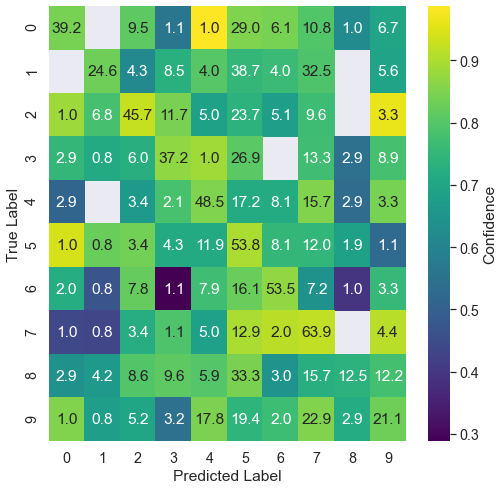

In [16]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_250, test_labels)

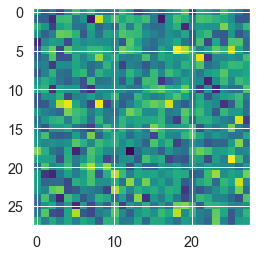

In [17]:
test_450 = test.copy()
#for i in test_450:
#    i+=np.random.randint(-450,450,784)
for i in range(len(test_450)):
    test_450[i] = test_450[i] + np.random.normal(0,450,784)
test_450 = normalize(test_450)
plt.imshow((test_450[0].reshape((28,28))),cmap = 'viridis')

(<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>, 1)

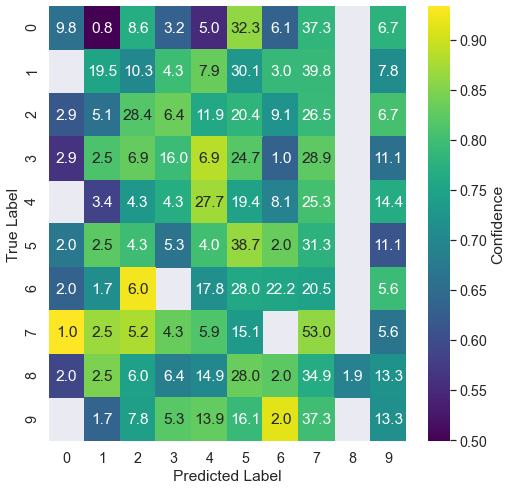

In [18]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_450, test_labels)

In [19]:
def plot_noise_to_confidence(trained_estimator,
                             test_data,
                             test_labels,
                             noise_range = [0]):
    x_axis = noise_range
    correct = []
    incorrect = []
    for i in noise_range:
        test_data_copy = test_data.copy()
        for j in range(len(test_data_copy)):
            if i == 0:
                pass
            else:
                test_data_copy[j] = test_data_copy[j] + np.random.normal(0,i,784)
        test_data_copy = normalize(test_data_copy)
        
        data = confusion_image(trained_estimator, test_data_copy, test_labels, return_type = 'confidence')
        
        diag = list(np.diag(np.array(data)))
        
        data_copy = data.copy()
        np.fill_diagonal(data_copy.values, np.nan)
        rest = list(np.mean(data_copy))
        
        correct.append(diag)
        incorrect.append(rest)
        
    correct = np.array(correct)
    incorrect = np.array(incorrect)
    
    fig = plt.figure(figsize = (15,20))
    
    for i in range(10):
        ax = fig.add_subplot(5,2,i+1)   
        ax.plot(x_axis, correct[:,i], label = 'confidence of correct classification')
        ax.plot(x_axis, incorrect[:,i], label = 'mean confidence of incorrect classifications')
        ax.set_title('Class {}'.format(i))
        ax.set_xlabel('Noise Range')
        ax.set_ylabel('Confidence')
        ax.legend()
    plt.tight_layout() 

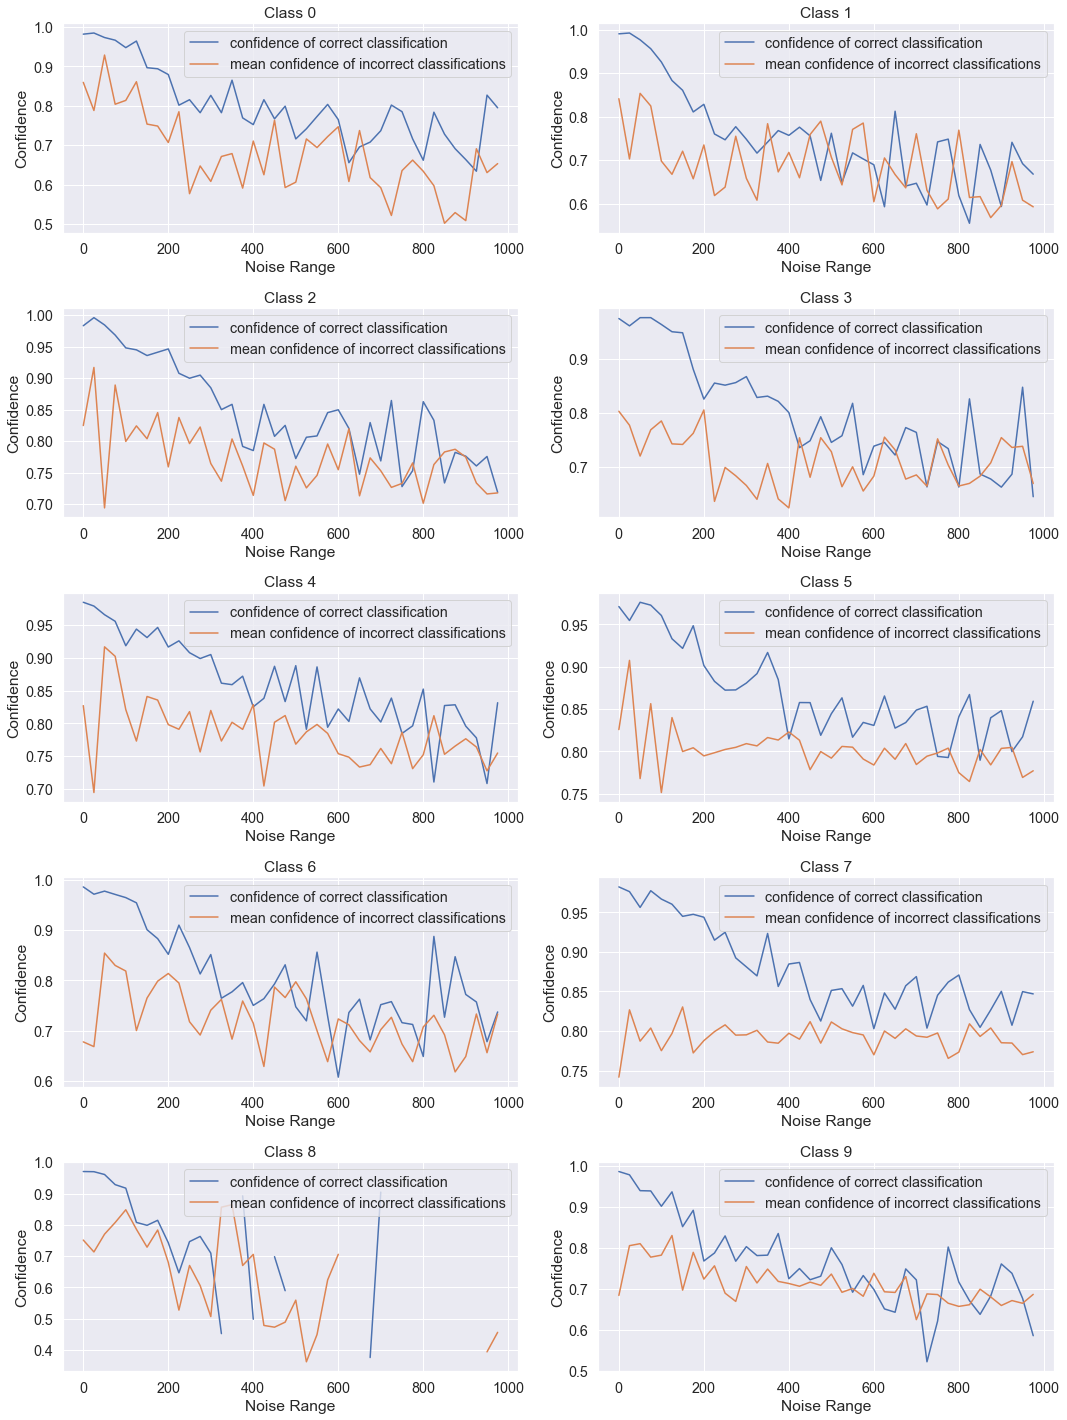

In [20]:
plot_noise_to_confidence(trained_model, test, test_labels, list(np.arange(0,1000,25)))

In [21]:
def plot_conf_to_acc(trained_estimator,
                             test_data,
                             test_labels,
                             noise_range = [0]):
    confidence = []
    accuracy = []
    for i in noise_range:
        test_data_copy = test_data.copy()
        for j in range(len(test_data_copy)):
            if i == 0:
                pass
            else:
                test_data_copy[j] = test_data_copy[j] + np.random.normal(0,i,784)
        test_data_copy = normalize(test_data_copy)
        
        img_conf = confusion_image(trained_estimator, test_data_copy, test_labels, return_type = 'confidence')
        img_acc = confusion_image(trained_estimator, test_data_copy, test_labels, return_type = 'accuracy')
        
        confidence.append(np.mean(np.mean(img_conf)))
        accuracy.append(img_acc)
        
    confidence = np.array(confidence)
    accuracy = np.array(accuracy)
    
    plt.figure(figsize = (20,10))
    plt.scatter(confidence, accuracy)
    plt.title('Mean Confidence vs Accuracy')
    plt.xlabel('Mean Confidence')
    plt.ylabel('Accuracy')
    plt.tight_layout() 

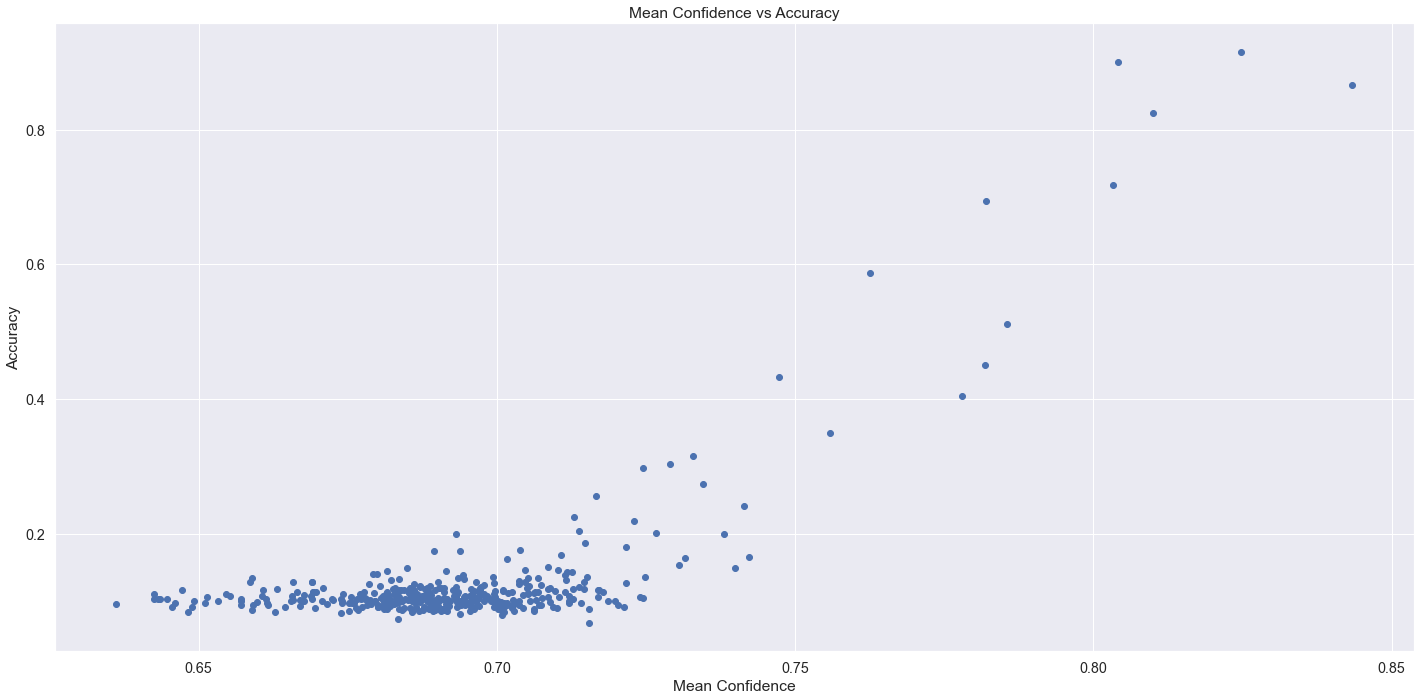

In [22]:
plot_conf_to_acc(trained_model, test, test_labels, list(np.arange(0,10000,25)))

In [23]:
def dke_plot(trained_estimator,
             test_data,
             test_labels,
             noise_range = [0]):
    
    x_axis = noise_range
    confidence = []
    for i in noise_range:
        test_data_copy = test_data.copy()
        for j in range(len(test_data_copy)):
            if i == 0:
                pass
            else:
                test_data_copy[j] = test_data_copy[j] + np.random.normal(0,i,784)
        test_data_copy = normalize(test_data_copy)
        
        img_conf = confusion_image(trained_estimator, test_data_copy, test_labels, return_type = 'confidence')
        
        confidence.append(np.mean(np.mean(img_conf)))
        
    confidence = np.array(confidence)
    
    
    x_axis_2 = 1/x_axis
    #x_axis_2 = np.flip(x_axis_2)
    
    plt.figure(figsize = (20,10))
    plt.loglog(x_axis_2, confidence)
    plt.title('Noise Level vs Mean Confidence')
    plt.xlabel('Noise Level')
    plt.ylabel('Mean Confidence')
    plt.tight_layout() 

<ipython-input-23-7fc2f225b855>:24: RuntimeWarning: divide by zero encountered in true_divide
  x_axis_2 = 1/x_axis


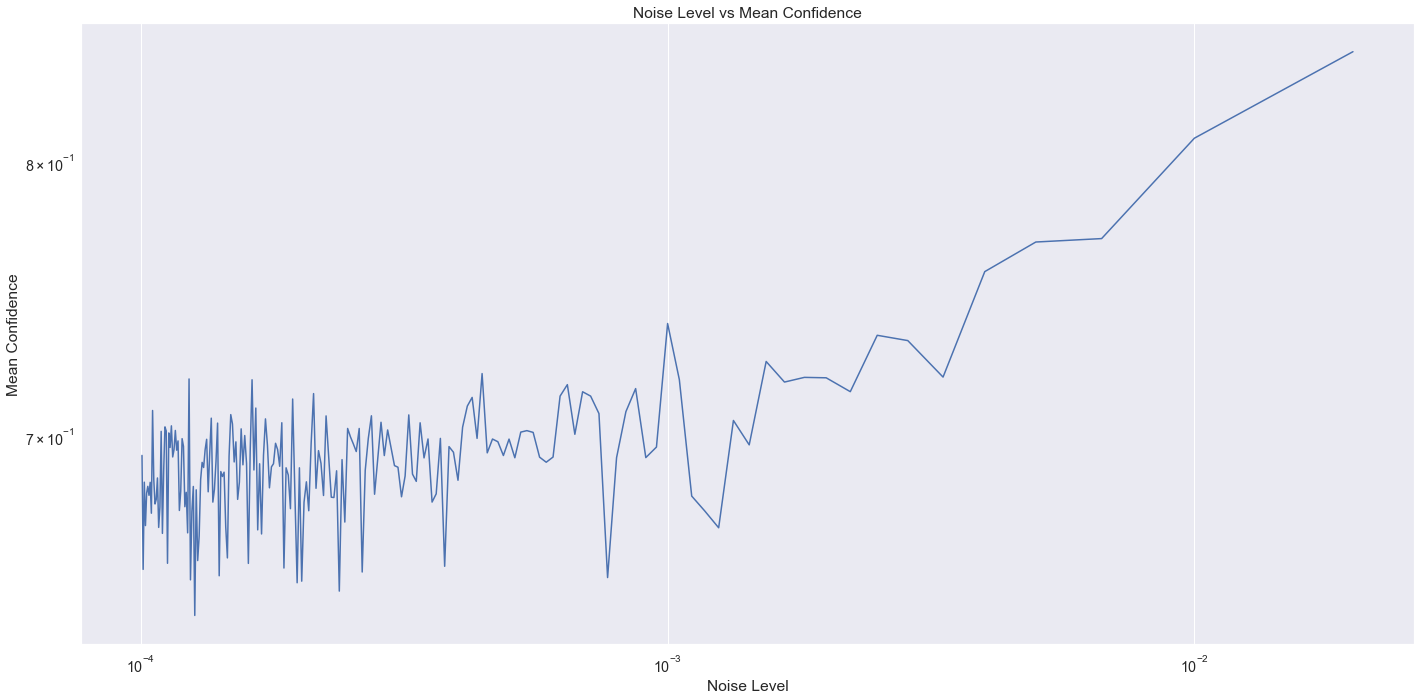

In [24]:
dke_plot(trained_model, test, test_labels, np.arange(0,10000,50))

In [25]:
def dke_plot(trained_estimator,
             test_data,
             test_labels,
             noise_range = [0]):
    
    x_axis = noise_range
    confidence = []
    for i in noise_range:
        test_data_copy = test_data.copy()
        for j in range(len(test_data_copy)):
            if i == 0:
                pass
            else:
                test_data_copy[j] = test_data_copy[j] + np.random.normal(0,i,784)
        test_data_copy = normalize(test_data_copy)
        
        img_conf = confusion_image(trained_estimator, test_data_copy, test_labels, return_type = 'confidence')
        
        confidence.append(np.mean(np.mean(img_conf)))
        
    confidence = np.array(confidence)
    
    
    x_axis_2 = 1/x_axis
    #x_axis_2 = np.flip(x_axis_2)
    
    pfit = np.polyfit(x_axis_2, confidence, 5)
    linear_fit = np.poly1d(pfit)
    
    plt.figure(figsize = (20,10))
    plt.scatter(x_axis_2, confidence, label = 'data points')
    plt.plot(x_axis_2, linear_fit(x_axis_2), color = 'red', label = 'regression line')
    plt.title('Noise Level vs Mean Confidence', fontsize=20)
    plt.xlabel('1/Noise Level', fontsize=20)
    plt.ylabel('Mean Confidence', fontsize=20)
    plt.yscale('log')
    plt.xscale('log')
    plt.legend(fontsize = 20)
    plt.tight_layout() 

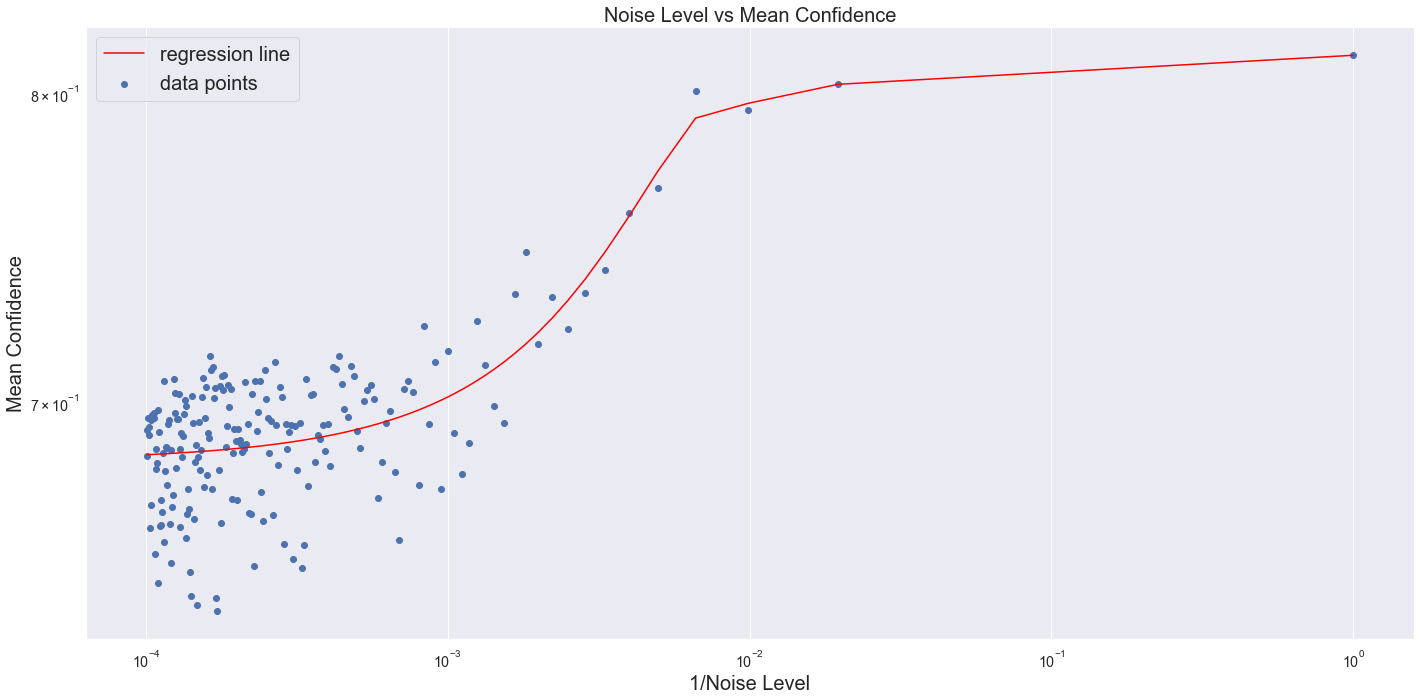

In [26]:
dke_plot(trained_model, test, test_labels, np.arange(1,10000,50))